<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


In [ ]:
!pip install fitter

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions


rawdf = pd.read_csv(f"https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv")

rawdf.set_index(rawdf.time)
rawdf.columns
del rawdf['Unnamed: 0'] #Eliminar la columna de indice anterior
print(rawdf[0:2])
print(*rawdf.columns, sep='\n')
print("\n3. Podemos ver las columnas incluidas en el dataset. Los intervalos de tiempo entre los datos es en efecto una hora. Cada fila contiene un valor de entrada (inicio), valor de cierre (fin) ,\n valor más alto y más bajo durante el intervalo de tiempo. Incluye además información respecto a la cantidad de actualizaciones (ticks) que hubo en el precio, la diferencia entre los \n valores de compra/venta (spread), promedio de valor de apertura/cierre y las pendientes (diferencias) de sus valores de cierre y apertura. \n")

ColumnasCheck = rawdf.isnull().any(axis="rows").sum()
FilasCheck = rawdf.isnull().any(axis="columns").sum()
print(f"4. Hay {ColumnasCheck} columnas con al menos un valor nulo y {FilasCheck} filas con al menos un valor nulo.")
print(f"Podemos afirmar que el dataset está completo pues todas las filas y columnas tienen valores no nulos. Sin embargo, esto no quiere decir que los datos estén completamente limpios.")

df = rawdf[['close']].set_index(pd.to_datetime(rawdf.time))
df["DiffPrice"] = df.close.diff(1) #Agregamos la nueva columna con la pendiente de los precios de cierre
df = df.drop(df.index[0]) #Sabemos que la primera diferencia dará un dato nulo por lo tanto lo descartamos

                  time     open     high      low    close  tick_volume  \
0  2022-07-25 13:00:00  1.02427  1.02430  1.02145  1.02345         3927   
1  2022-07-25 14:00:00  1.02345  1.02578  1.02288  1.02299         5344   

   spread  real_volume  MeanCloseOpen  Diff_Close  Diff_Open  \
0       8            0        1.02386    -0.00046   -0.00082   
1       8            0        1.02322    -0.00046   -0.00082   

   Diff_MeanCloseOpen  
0            -0.00064  
1            -0.00064  
time
open
high
low
close
tick_volume
spread
real_volume
MeanCloseOpen
Diff_Close
Diff_Open
Diff_MeanCloseOpen

3. Podemos ver las columnas incluidas en el dataset. Los intervalos de tiempo entre los datos es en efecto una hora. Cada fila contiene un valor de entrada (inicio), valor de cierre (fin) ,
 valor más alto y más bajo durante el intervalo de tiempo. Incluye además información respecto a la cantidad de actualizaciones (ticks) que hubo en el precio, la diferencia entre los 
 valores de compra/venta

close  DiffPrice
time                                   
2022-07-25 14:00:00  1.02299   -0.00046
2022-07-25 15:00:00  1.02457    0.00158
2022-07-25 16:00:00  1.02485    0.00028
2022-07-25 17:00:00  1.02181   -0.00304
2022-07-25 18:00:00  1.02099   -0.00082

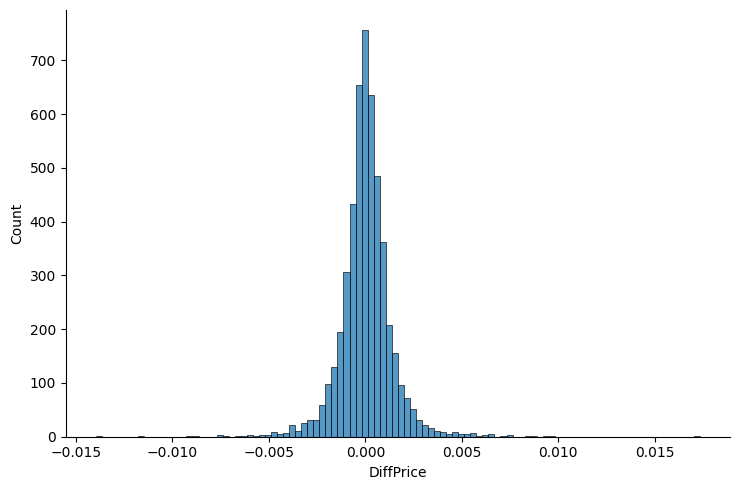

In [ ]:
sns.displot(df,x="DiffPrice",bins = 100, aspect = 1.5)
df.head()

In [ ]:
f = Fitter(df.DiffPrice,distributions=get_distributions())
f.fit()

               sumsquare_error        aic         bic  kl_div  ks_statistic  \
johnsonsu          1660.385337   9.954290   36.022262     inf      0.011042   
genhyperbolic      1821.497871  21.312693   53.897659     inf      0.011745   
norminvgauss       1938.681101  89.072151  115.140124     inf      0.009911   
tukeylambda        1981.924322  -5.791199   13.759781     inf      0.019856   
jf_skew_t          2093.573233 -54.605696  -28.537723     inf      0.012692   

               ks_pvalue  
johnsonsu       0.571935  
genhyperbolic   0.491911  
norminvgauss    0.706069  
tukeylambda     0.038305  
jf_skew_t       0.393090  
--------------------
{'johnsonsu': {'a': -0.020654532350683215, 'b': 1.049797421216857, 'loc': -1.5194909287993722e-05, 'scale': 0.0008808828671326262}}
Según el método get_best de la clase Fitter, la mejor distribución para estos datos es Johnsonsu y sus parámetros a, b, loc y scale en el orden correspondiente son: 
(-0.020654532350683215, 1.049797421216857, -

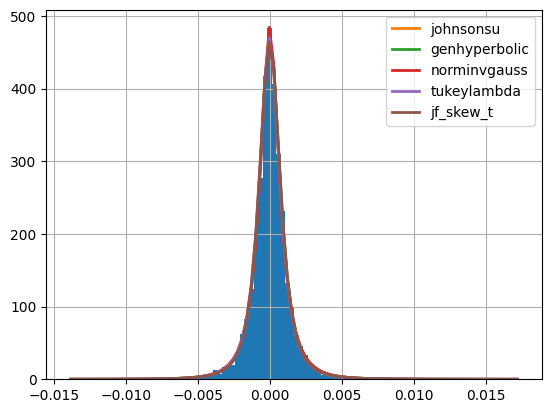

In [ ]:
print(f.summary().head())
print("--------------------")
# Indentificamos la mejor distribucion con el error cuadratico medio
print(f.get_best(method = 'sumsquare_error'))
print("Según el método get_best de la clase Fitter, la mejor distribución para estos datos es Johnsonsu y sus parámetros a, b, loc y scale en el orden correspondiente son: ")
print(f.fitted_param["johnsonsu"])

In [ ]:
print("Escogemos un intervalo de solo el 2023:")
df23 = df.loc['2023-01-01':'2023-12-31']
print(df23.head())
print("\nEl promedio de todos los datos de valor de cierre agrupando los datos por cada 15 Días es "+str(round(df23.groupby(pd.Grouper(freq='15D'))['close'].mean().mean(),4))+", cada semana es "+str(round(df23.groupby(pd.Grouper(freq='1W'))['close'].mean().mean(),4))+" y cada mes es "+str(round(df23.groupby(pd.Grouper(freq='1M'))['close'].mean().mean(),4)))

Escogemos un intervalo de solo el 2023:
                       close  DiffPrice
time                                   
2023-01-02 00:00:00  1.06796   -0.00200
2023-01-02 01:00:00  1.06965    0.00169
2023-01-02 02:00:00  1.07058    0.00093
2023-01-02 03:00:00  1.06896   -0.00162
2023-01-02 04:00:00  1.06880   -0.00016

El promedio de todos los datos de valor de cierre agrupando los datos por cada 15 Días es 1.0812, cada semana es 1.0807 y cada mes es 1.0829


2023-01-31 00:00:00
2023-02-28 00:00:00
2023-03-31 00:00:00
2023-04-30 00:00:00
2023-05-31 00:00:00


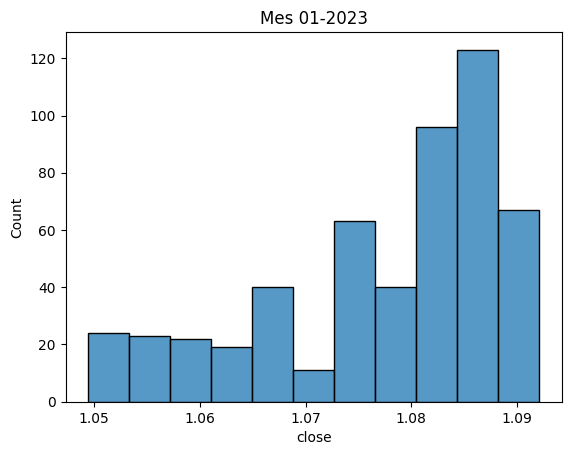

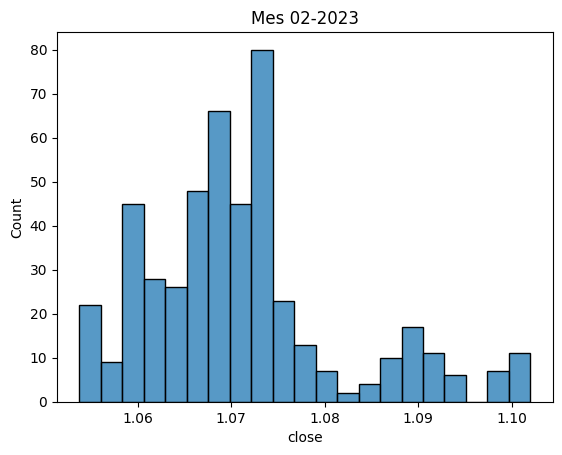

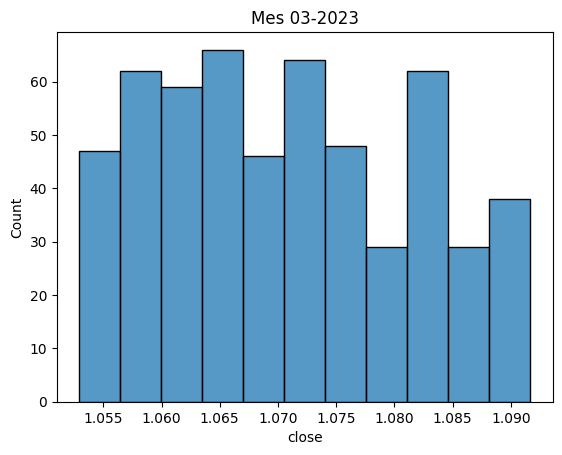

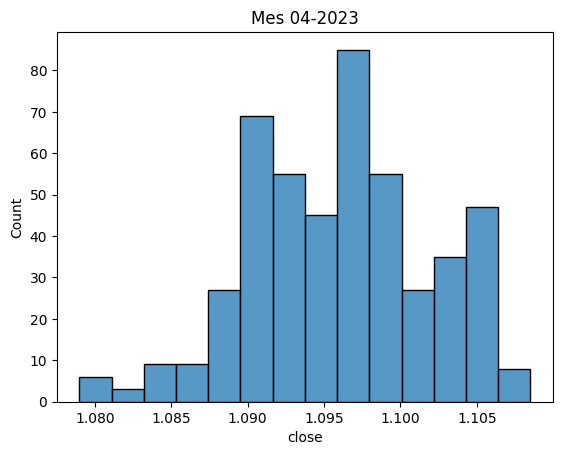

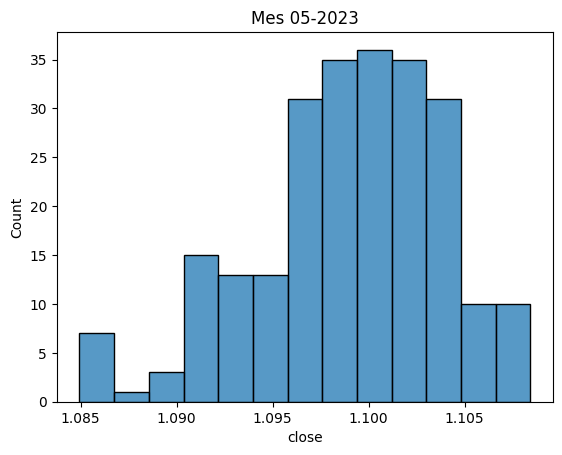

In [ ]:
dfsmes = df23.groupby(pd.Grouper(freq='1M'))
for name, group in dfsmes:
  print(name)
  fig, ax1 = plt.subplots()
  sns.histplot(data=group, x="close",ax=ax1)
  ax1.set_title("Mes "+str(name).split('-')[1]+"-2023")


## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



In [ ]:
"""
rawdf = pd.read_csv("")


df['time'] =  pd.to_datetime(df.time)
df.set_index("time", inplace=True)
df = df.drop(columns = ["Unnamed: 0"])
df["DiffClose"] = df.close.diff()
df2 = df[["DiffClose", "close"]][1:]
df2.DiffClose.hist(bins=1000)


!pip install fitter


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(df2.DiffClose,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
# Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]




f = Fitter(df2.DiffClose,
           distributions=['gamma',
                          'genhyperbolic',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
# Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]



df2.groupby(pd.Grouper(freq='15D')).mean()

"""

'\nrawdf = pd.read_csv("")\n\n\ndf[\'time\'] =  pd.to_datetime(df.time)\ndf.set_index("time", inplace=True)\ndf = df.drop(columns = ["Unnamed: 0"])\ndf["DiffClose"] = df.close.diff()\ndf2 = df[["DiffClose", "close"]][1:]\ndf2.DiffClose.hist(bins=1000)\n\n\n!pip install fitter\n\n\nfrom fitter import Fitter, get_common_distributions, get_distributions\n\nf = Fitter(df2.DiffClose,\n           distributions=[\'gamma\',\n                          \'lognorm\',\n                          "beta",\n                          "burr",\n                          "norm"])\nf.fit()\nf.summary()\n# Indentificamos la mejor distribucion con el error cuadratico medio\nf.get_best(method = \'sumsquare_error\')\n# Indentificamos parametros de la distrubicion beta\nf.fitted_param["beta"]\n\n\n\n\nf = Fitter(df2.DiffClose,\n           distributions=[\'gamma\',\n                          \'genhyperbolic\',\n                          "beta",\n                          "burr",\n                          "norm"]

Hint:


```python
df['time'] =  pd.to_datetime(df.time)
df.set_index("time", inplace=True)
df = df.drop(columns = ["Unnamed: 0"])
df["DiffClose"] = df.close.diff()
df2 = df[["DiffClose", "close"]][1:]
df2.DiffClose.hist(bins=1000)


!pip install fitter


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(df2.DiffClose,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()a
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]




f = Fitter(df2.DiffClose,
           distributions=['gamma',
                          'genhyperbolic',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]



df2.groupby(pd.Grouper(freq='15D')).mean()
```

In [ ]:
#Siguiendo las instrucciones para importar el repositorio:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
#print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [ ]:
Rawdf = pd.read_csv("https://archive.ics.uci.edu/static/public/17/data.csv")

Rawdf.rename(columns = lambda col: ''.join([i.capitalize() for i in col.split('_')]) if len(col.split('_'))>0 else col.capitalize(),inplace = True)
print("1,2. Columnas en el dataset:")
print(*Rawdf.columns, sep='\n')

DatosNulos = Rawdf.isnull().any(axis="columns").sum()
print("\n3,4\n• El dataset contiene "+str(Rawdf.shape[0])+" filas con "+str(DatosNulos)+" filas con al menos un valor nulo")
print("• Contiene un total de "+str(Rawdf.shape[1])+" columnas. Dos de ellas son categóricas: Su ID y su Diagnóstico que tiene dos posibles valores 'B' (Benigno) o 'M' (Maligno).\n  El resto de valores son de tipo continuo numérico y se refieren a características del núcleo celular a partir de imágenes.\n")
print("Si tuviera que reemplazar valores no nulos de columnas importantes, usaría el valor promedio de los datos no nulos para que estos datos no afecten el análisis, fittings u operaciones sobre ellos.\nEsencialmente, si puedo prescindir de estos datos para un procedimiento específico, haría drop a estas filas.")
df = Rawdf # Como sabemos que no hay datos nulos, este será el dataset final con el que trabajaremos

1,2. Columnas en el dataset:
Id
Radius1
Texture1
Perimeter1
Area1
Smoothness1
Compactness1
Concavity1
ConcavePoints1
Symmetry1
FractalDimension1
Radius2
Texture2
Perimeter2
Area2
Smoothness2
Compactness2
Concavity2
ConcavePoints2
Symmetry2
FractalDimension2
Radius3
Texture3
Perimeter3
Area3
Smoothness3
Compactness3
Concavity3
ConcavePoints3
Symmetry3
FractalDimension3
Diagnosis

3,4
• El dataset contiene 569 filas con 0 filas con al menos un valor nulo
• Contiene un total de 32 columnas. Dos de ellas son categóricas: Su ID y su Diagnóstico que tiene dos posibles valores 'B' (Benigno) o 'M' (Maligno).
  El resto de valores son de tipo continuo numérico y se refieren a características del núcleo celular a partir de imágenes.

Si tuviera que reemplazar valores no nulos de columnas importantes, usaría el valor promedio de los datos no nulos para que estos datos no afecten el análisis, fittings u operaciones sobre ellos.
Esencialmente, si puedo prescindir de estos datos para un procedimient

In [ ]:
print("5.");print(*df.Diagnosis.unique(),sep='\n')
CountMaligno = df[df.Diagnosis=='M'].Diagnosis.count()
CountBenigno = df[df.Diagnosis=='B'].Diagnosis.count()
print("Hay un total de "+str(CountMaligno)+" ("+str(round((CountMaligno / df.shape[0])*100,2))+"%) diagnósticos Malignos(M) y "+str(CountBenigno)+" ("+str(round((CountBenigno / df.shape[0])*100,2))+"%) diagnósticos Benignos(B)")

5.
M
B
Hay un total de 212 (37.26%) diagnósticos Malignos(M) y 357 (62.74%) diagnósticos Benignos(B)


[[Text(0, 0, '212')], [Text(0, 0, '357')]]

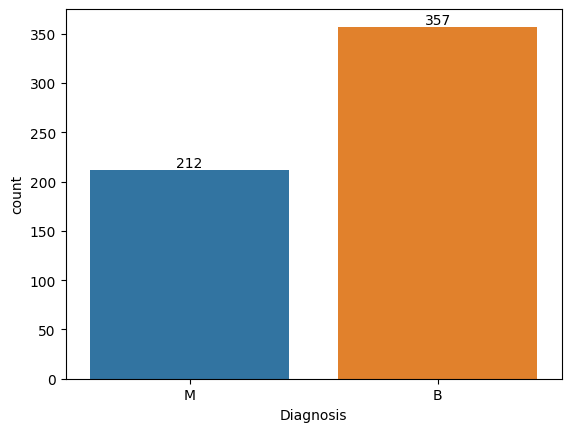

In [ ]:
import seaborn as sns
ax = sns.countplot(data=df,x='Diagnosis',hue="Diagnosis")
[ax.bar_label(container) for container in ax.containers]

In [ ]:
df['DiagnosisNumeric'] = df.Diagnosis.apply(lambda x: 1 if x=='M' else 0);print("7.")
df.DiagnosisNumeric[20:40]

7.


20    0
21    0
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    0
38    1
39    1
Name: DiagnosisNumeric, dtype: int64

In [ ]:
dftmp = df.select_dtypes(include=['float64']).apply(lambda x : ((x - np.mean(x))/np.std(x)));print("8.")
#dftmp["Diagnosis"] = breast_cancer_wisconsin_diagnostic.data.targets
df = pd.concat([dftmp, df.Diagnosis], axis=1)
df

8.


Radius1  Texture1  Perimeter1     Area1  Smoothness1  Compactness1  \
0    1.097064 -2.073335    1.269934  0.984375     1.568466      3.283515   
1    1.829821 -0.353632    1.685955  1.908708    -0.826962     -0.487072   
2    1.579888  0.456187    1.566503  1.558884     0.942210      1.052926   
3   -0.768909  0.253732   -0.592687 -0.764464     3.283553      3.402909   
4    1.750297 -1.151816    1.776573  1.826229     0.280372      0.539340   
..        ...       ...         ...       ...          ...           ...   
564  2.110995  0.721473    2.060786  2.343856     1.041842      0.219060   
565  1.704854  2.085134    1.615931  1.723842     0.102458     -0.017833   
566  0.702284  2.045574    0.672676  0.577953    -0.840484     -0.038680   
567  1.838341  2.336457    1.982524  1.735218     1.525767      3.272144   
568 -1.808401  1.221792   -1.814389 -1.347789    -3.112085     -1.150752   

     Concavity1  ConcavePoints1  Symmetry1  FractalDimension1  ...  Texture3  \
0      2.652874        2.532475   2.217515           2.255747  ... -1.359293   
1     -0.023846        0.548144   0.001392          -0.868652  ... -0.369203   
2      1.363478        2.037231   0.939685          -0.398008  ... -0.023974   
3      1.915897        1.451707   2.867383           4.910919  ...  0.133984   
4      1.371011        1.428493  -0.009560          -0.562450  ... -1.466770   
..          ...             ...        ...                ...  ...       ...   
564    1.947285        2.320965  -0.312589          -0.931027  ...  0.117700   
565    0.693043        1.263669  -0.217664          -1.058611  ...  2.047399   
566    0.046588        0.105777  -0.809117          -0.895587  ...  1.374854   
567    3.296944        2.658866   2.137194           1.043695  ...  2.237926   
568   -1.114873       -1.261820  -0.820070          -0.561032  ...  0.764190   

     Perimeter3     Area3  Smoothness3  Compactness3  Concavity3  \
0      2.303601  2.001237     1.307686      2.616665    2.109526   
1      1.535126  1.890489    -0.375612     -0.430444   -0.146749   
2      1.347475  1.456285     0.527407      1.082932    0.854974   
3     -0.249939 -0.550021     3.394275      3.893397    1.989588   
4      1.338539  1.220724     0.220556     -0.313395    0.613179   
..          ...       ...          ...           ...         ...   
564    1.752563  2.015301     0.378365     -0.273318    0.664512   
565    1.421940  1.494959    -0.691230     -0.394820    0.236573   
566    0.579001  0.427906    -0.809587      0.350735    0.326767   
567    2.303601  1.653171     1.430427      3.904848    3.197605   
568   -1.432735 -1.075813    -1.859019     -1.207552   -1.305831   

     ConcavePoints3  Symmetry3  FractalDimension3  Diagnosis  
0          2.296076   2.750622           1.937015          M  
1          1.087084  -0.243890           0.281190          M  
2          1.955000   1.152255           0.201391          M  
3          2.175786   6.046041           4.935010          M  
4          0.729259  -0.868353          -0.397100          M  
..              ...        ...                ...        ...  
564        1.629151  -1.360158          -0.709091          M  
565        0.733827  -0.531855          -0.973978          M  
566        0.414069  -1.104549          -0.318409          M  
567        2.289985   1.919083           2.219635          M  
568       -1.745063  -0.048138          -0.751207          B  

[569 rows x 31 columns]

In [ ]:
import re
PatternArray = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'ConcavePoints', "Symmetry", "FractalDimension"]
MeansColumnsNames = ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]

for i,pattern in enumerate(PatternArray):
  TmpPattern = []
  for columna in df.columns:
    if(re.match(f"^{pattern}\d+",columna)):
      TmpPattern.append(columna)
  df[MeansColumnsNames[i]] = df[TmpPattern].mean(axis=1)
print("9.");print(df.Diagnosis.head())
df.shape #Alles gut

9.
0    M
1    M
2    M
3    M
4    M
Name: Diagnosis, dtype: object


<ipython-input-31-020270e57ab4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[MeansColumnsNames[i]] = df[TmpPattern].mean(axis=1)
<ipython-input-31-020270e57ab4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[MeansColumnsNames[i]] = df[TmpPattern].mean(axis=1)
<ipython-input-31-020270e57ab4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

(547, 41)

10.


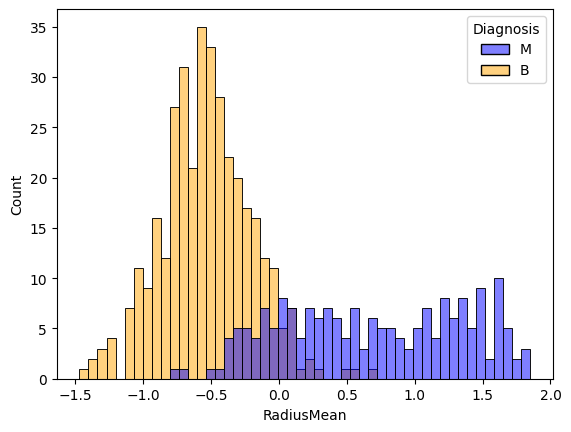

In [ ]:
sns.histplot(data=df,x='RadiusMean',hue='Diagnosis',bins=50,palette={'M': 'blue', 'B': 'orange'});print("10.")

11.


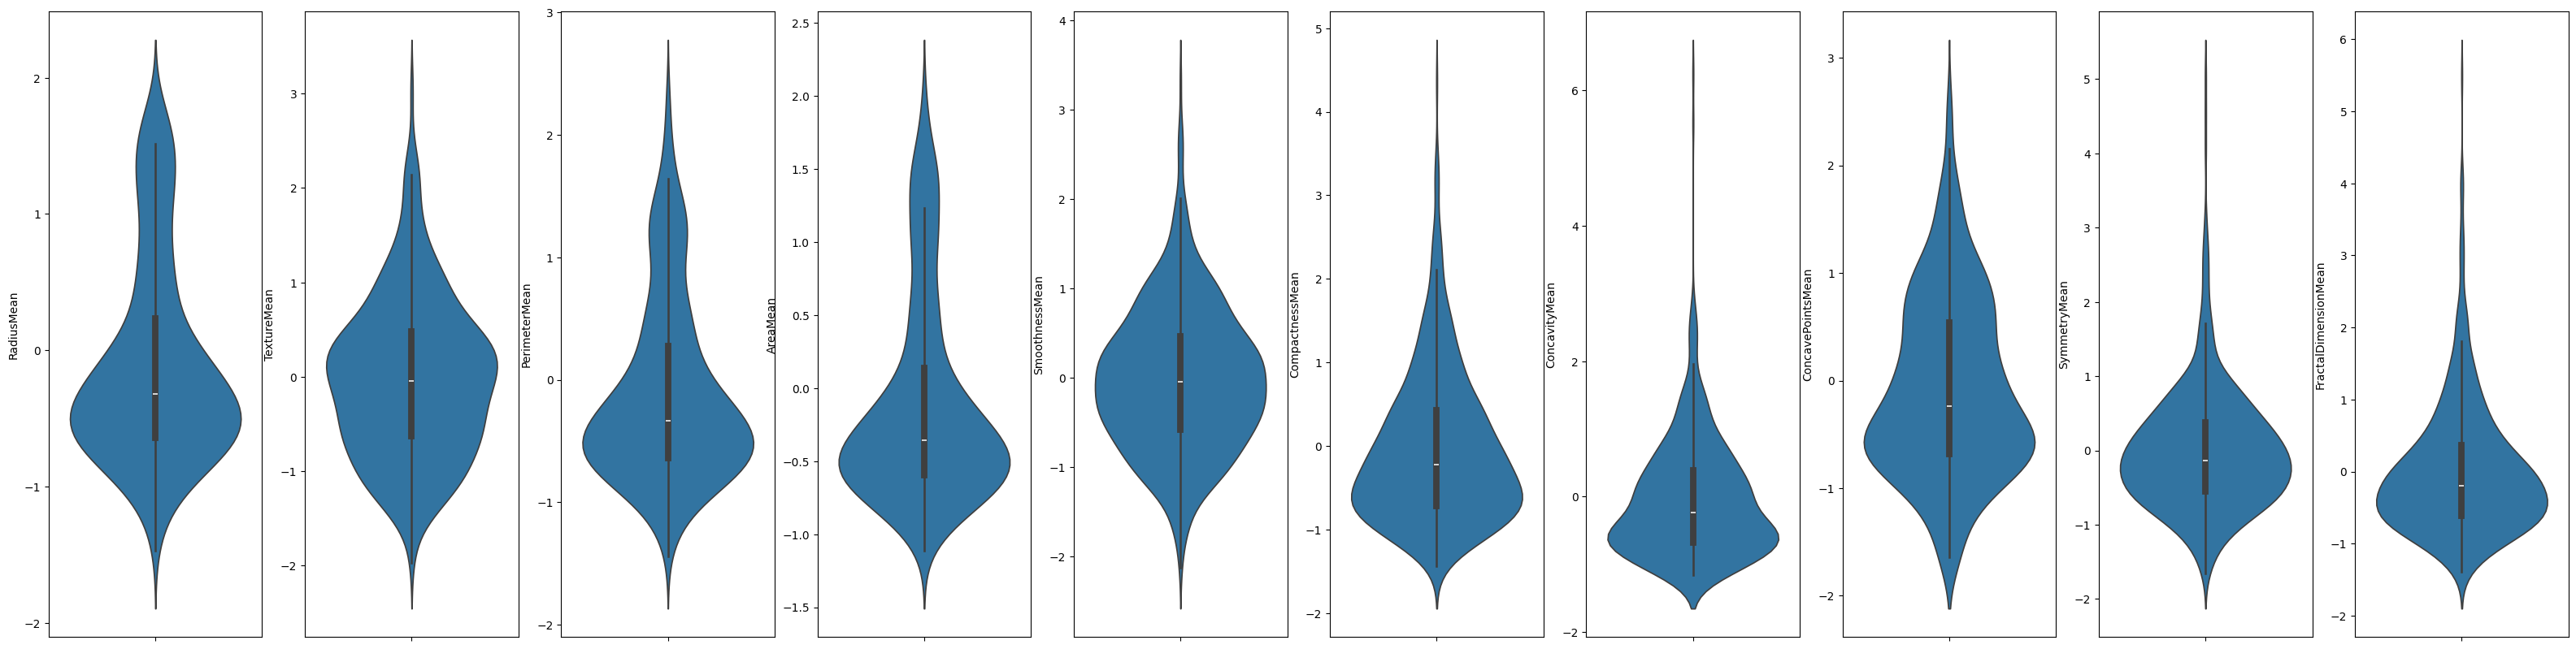

In [ ]:
fig, axes = plt.subplots(1,10,figsize=(40,10))
print("11.")
for i,columna in enumerate(MeansColumnsNames):
  sns.violinplot(ax=axes[i],data=df,y=columna)

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

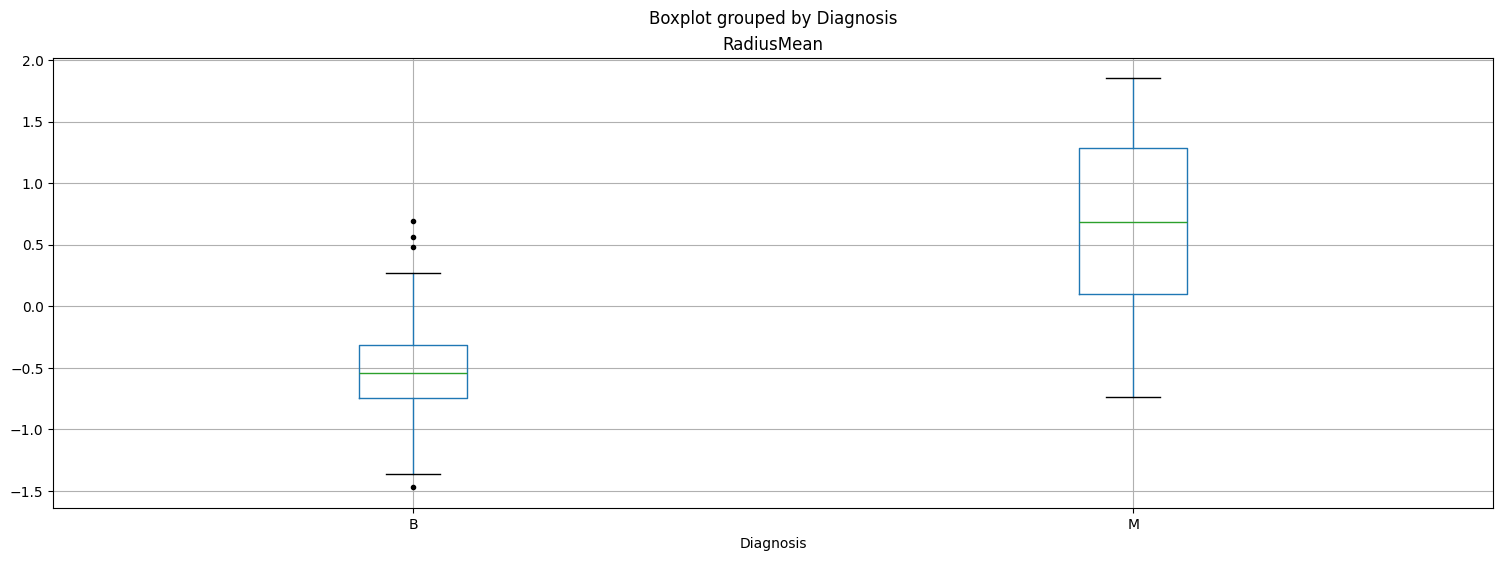

In [ ]:
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))

In [ ]:
#Si se corre esta celda múltiples veces, creará nuevos intervalos usando los quantiles y los datos previamente truncados, reduciendo más de lo esperado los datos outliers.
Q1 = df['RadiusMean'].quantile(0.25)
Q3 = df['RadiusMean'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['RadiusMean'] < (Q1 - 1.5 * IQR)) | (df['RadiusMean'] > (Q3 + 1.5 * IQR)))]
print("12. Nuevo tamaño de los datos: "+str(df.shape[0]))
print("De los 569 datos originales, se descartan 22 datos atípicos")

12. Nuevo tamaño de los datos: 525
De los 569 datos originales, se descartan 22 datos atípicos


In [ ]:
df.shape

(525, 41)

13.
                      RadiusMean  TextureMean  PerimeterMean  AreaMean  \
RadiusMean              1.000000     0.218003       0.986823  0.988989   
TextureMean             0.218003     1.000000       0.230613  0.204401   
PerimeterMean           0.986823     0.230613       1.000000  0.976518   
AreaMean                0.988989     0.204401       0.976518  1.000000   
SmoothnessMean          0.060548     0.089372       0.079820  0.040814   
CompactnessMean         0.364841     0.194157       0.443017  0.339485   
ConcavityMean           0.440483     0.207519       0.496887  0.424809   
ConcavePointsMean       0.691067     0.191656       0.739282  0.664082   
SymmetryMean            0.123714     0.119009       0.151701  0.091606   
FractalDimensionMean   -0.063489     0.096657      -0.004363 -0.086695   

                      SmoothnessMean  CompactnessMean  ConcavityMean  \
RadiusMean                  0.060548         0.364841       0.440483   
TextureMean                 0.089372 

<Axes: >

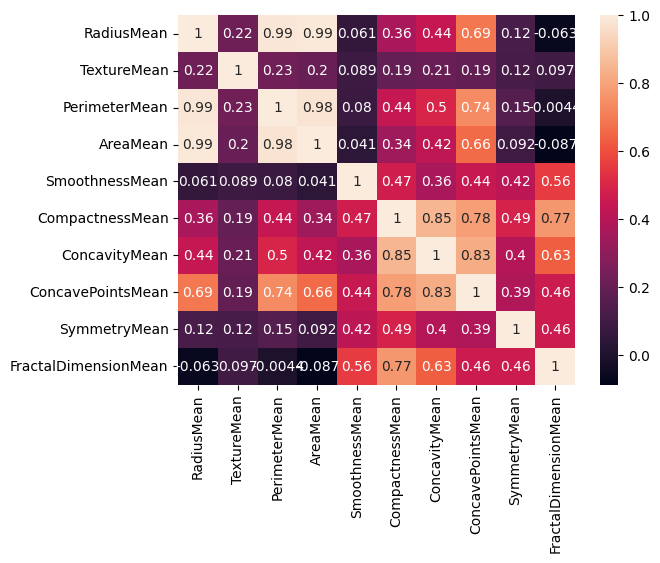

In [ ]:
CorrMax = df[MeansColumnsNames].corr(method='pearson')
print("13.")
print(CorrMax)
sns.heatmap(CorrMax,annot=True)

Una forma de hayar correlaciones de forma visual y global cuando se tiene múltiples variables como es en este caso es haciendo un pairplot, una función de Seaborn que crea un arreglo de gráficos que correlaciona los datos en forma matricial. Para posiciones diferentes a la diagonal, se hace un scatter plot, para las posiciones en la diagonal, se muestra una distribución univariada para mostrar la distribución marginal de ese dato cruzado. [Documentación](https://seaborn.pydata.org/generated/seaborn.pairplot.html):



In [ ]:
MeansColumnsNames.append('Diagnosis')
print(MeansColumnsNames)


['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', 'SymmetryMean', 'FractalDimensionMean', 'Diagnosis']


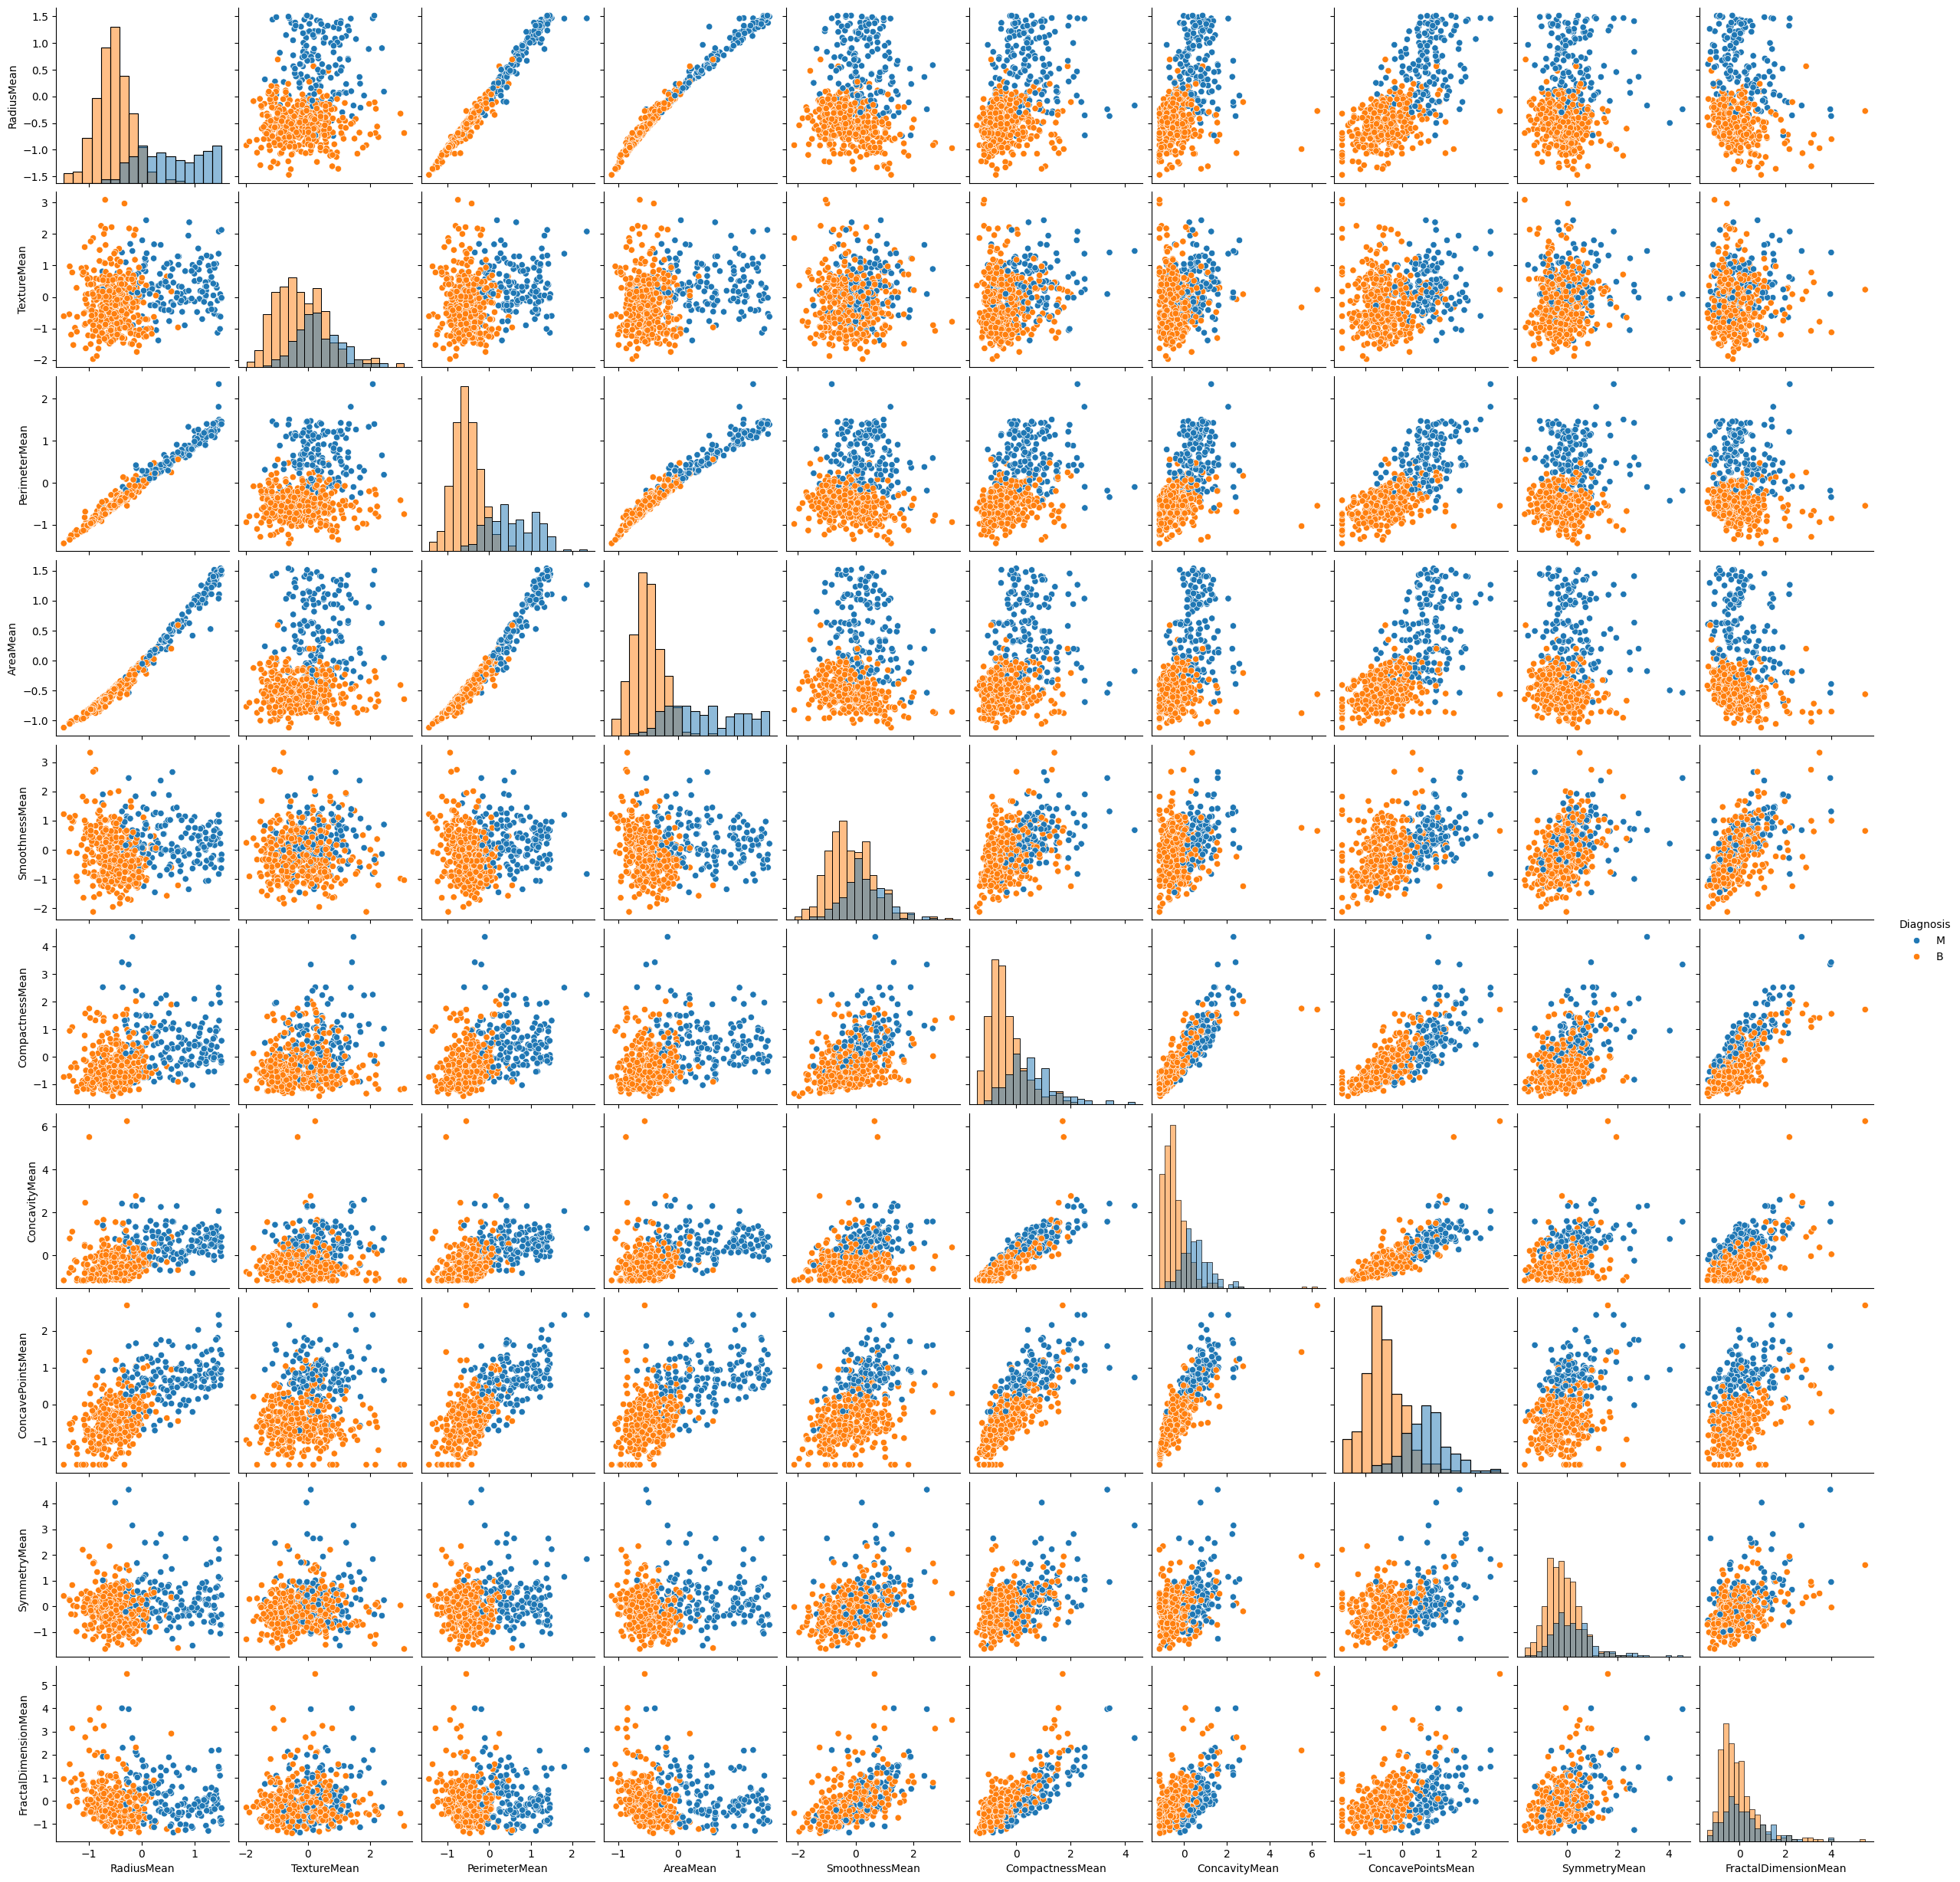

In [ ]:
sns.pairplot(df[MeansColumnsNames], hue="Diagnosis", diag_kind="hist")